<a href="https://colab.research.google.com/github/sayalichaskar293/ML/blob/main/Meeting_Summarizer_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meeting Summarizer

In [1]:
pip install rouge

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rouge import Rouge
import numpy as np
import networkx as nx

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Specify the path to your uploaded .txt file
file_path = '/content/Sample Meeting Transcript (1).txt'

# Read the content of the file
with open(file_path, 'r') as file:
    meeting_transcript = file.read()

# Print the content
print(len(meeting_transcript))

7211


In [4]:
# Step 1: Tokenize sentences
print("Sentences: ")
sentences = sent_tokenize(meeting_transcript)
print(sentences)

Sentences: 
['Chairman Wormsley (at the proper time and place, after taking the chair and striking the gavel on the table): This meeting of the CTAS County Commission will come to order.', 'Clerk please call the role.', '(Ensure that a majority of the members are present.)', 'Chairman Wormsley: Each of you has received the agenda.', 'I will entertain a motion that the agenda be approved.', 'Commissioner Brown: So moved.', 'Commissioner Hobbs: Seconded\n\nChairman Wormsley: It has been moved and seconded that the agenda be approved as received by the members.', 'All those in favor signify by saying "Aye"?...Opposed by saying "No"?...The agenda is approved.', 'You have received a copy of the minutes of the last meeting.', 'Are there any corrections or additions to the meeting?', 'Commissioner McCroskey: Mister Chairman, my name has been omitted from the Special Committee on Indigent Care.', 'Chairman Wormsley: Thank you.', 'If there are no objections, the minutes will be corrected to inc

In [5]:
  # Step 2: Extract spoken content and preprocess
  print("Extracted text: ")
  p=2
  spoken_content = []
  for line in meeting_transcript.split('\n'):
      if ':' in line:
          speaker, content = line.split(':', 1)
          spoken_content.append(content)
  print(spoken_content)

Extracted text: 
[' This meeting of the CTAS County Commission will come to order. Clerk please call the role. (Ensure that a majority of the members are present.)', ' Each of you has received the agenda. I will entertain a motion that the agenda be approved.', ' So moved.', ' Seconded', ' It has been moved and seconded that the agenda be approved as received by the members. All those in favor signify by saying "Aye"?...Opposed by saying "No"?...The agenda is approved. You have received a copy of the minutes of the last meeting. Are there any corrections or additions to the meeting?', ' Mister Chairman, my name has been omitted from the Special Committee on Indigent Care.', ' Thank you. If there are no objections, the minutes will be corrected to include the name of Commissioner McCroskey. Will the clerk please make this correction. Any further corrections? Seeing none, without objection the minutes will stand approved as read. (This is sort of a short cut way that is commonly used for

In [6]:
# Step 3: Define the Porter Stemmer
print("Preprocessed sentences: ")
stemmer = PorterStemmer()
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [stemmer.stem(word) for word in words]
    words = [word for word in words if word not in stopwords.words('english')]
    return " ".join(words)

preprocessed_sentences = [preprocess_text(content) for content in spoken_content]
print(preprocessed_sentences)

Preprocessed sentences: 
['thi meet cta counti commiss come order clerk pleas call role ensur major member present', 'ha receiv agenda entertain motion agenda approv', 'move', 'second', 'ha move second agenda approv receiv member favor signifi say aye oppos say agenda approv receiv copi minut last meet ani correct addit meet', 'mister chairman name ha omit special committe indig care', 'thank object minut correct includ name commission mccroskey clerk pleas make thi correct ani correct see none without object minut stand approv read thi sort short cut way commonli use approv minut agenda rather requir motion second', 'commission adkin first item agenda', 'mister chairman would like make motion approv resolut take money data process reserv account counti clerk offic move equip line purchas laptop comput', 'second motion', 'thi resolut ha motion second clerk pleas take vote', 'resolut pass take old busi last meet commission mckee motion sell properti near airport wa defer thi meet recogn

In [7]:
# Step 4: Calculate TF-IDF scores for words in sentences
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_sentences)
tfidf_scores = np.sum(tfidf_matrix, axis=1)
print("# TF-IDF matrix:")
print(tfidf_matrix.toarray())

print("\n")

print("# TF-IDF scores:")
for score in tfidf_scores:
    print(score[0], end=', ')
print()

# TF-IDF matrix:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.47380283 0.         0.        ]]


# TF-IDF scores:
[[3.8145166]], [[2.31513663]], [[1.]], [[1.]], [[4.05690679]], [[2.96921304]], [[4.8918752]], [[2.19556747]], [[4.72263707]], [[1.41358635]], [[2.95470946]], [[4.12108032]], [[1.67095236]], [[4.29184303]], [[4.67298889]], [[1.35511989]], [[1.96893346]], [[3.55126967]], [[1.91585659]], [[1.68230897]], [[3.71189095]], [[1.35511989]], [[3.82896217]], [[1.3371843]], [[1.3680438]], [[5.30941917]], [[1.94602075]], [[1.97708486]], [[3.2823598]], [[1.94384647]], [[1.95229925]], [[1.]], [[5.52756176]], [[3.99903022]], [[1.3

In [8]:
# Step 5: Create a graph based on cosine similarity between sentences
num_sentences = len(spoken_content)
similarity_matrix = cosine_similarity(tfidf_matrix)
graph = nx.Graph()

for i in range(num_sentences):
    for j in range(i + 1, num_sentences):
        similarity = similarity_matrix[i][j]
        graph.add_edge(i, j, weight=similarity)

# Display adjacency matrix of the graph
adjacency_matrix = nx.adjacency_matrix(graph)
print("Adjacency matrix of the graph:")
for row in adjacency_matrix.toarray():
    print(" ".join(["%.2f" % val for val in row]))

Adjacency matrix of the graph:
0.00 0.00 0.00 0.00 0.11 0.00 0.07 0.00 0.07 0.00 0.20 0.10 0.00 0.02 0.06 0.00 0.06 0.09 0.00 0.00 0.04 0.00 0.00 0.00 0.00 0.05 0.05 0.08 0.09 0.00 0.12 0.00 0.07 0.02 0.00 0.00 0.07 0.00 0.00 0.09 0.07 0.10 0.05 0.00 0.00 0.00 0.08
0.00 0.00 0.00 0.00 0.47 0.05 0.18 0.26 0.09 0.17 0.14 0.03 0.10 0.22 0.00 0.00 0.00 0.08 0.08 0.00 0.00 0.00 0.04 0.00 0.00 0.08 0.00 0.00 0.00 0.00 0.00 0.00 0.10 0.14 0.00 0.00 0.03 0.00 0.00 0.05 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.11 0.00 0.00 0.00 0.12 0.00 0.00 0.00 0.46 0.14 0.13 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.19 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.35 0.00 0.00 0.16 0.00 0.00 0.10 0.41 0.00 0.05 0.00 0.00 0.00 0.00 0.51 0.00 0.00
0.00 0.00 0.00 0.00 0.10 0.00 0.08 0.00 0.00 0.69 0.25 0.00 0.00 0.00 0.00 0.00 0.00 0.41 0.34 0.00 0.00 0.00 0.00 0.00 0.50 0.08 0.00 0.00 0.00 0.00 0.00 1.00 0.07 0.00 0.00 1.00 0.09 0.00 1.00 0.04 0.00 0.00 0.00 0.00 0.00 1.00 0.00
0.11 0.47 0.11 0.10 0.00 0.03

In [9]:

print("Scores: ")
scores = nx.pagerank(graph, weight='weight')
print(scores)

Scores: 
{0: 0.01450767572139652, 1: 0.016599229263528074, 2: 0.02006278929613026, 3: 0.03258428714524197, 4: 0.02307752192744424, 5: 0.00699645032892675, 6: 0.022471177691333277, 7: 0.016253893986892993, 8: 0.016129538908360757, 9: 0.03507014471269649, 10: 0.034554788513350955, 11: 0.021649394109308166, 12: 0.020566629606599215, 13: 0.030123946017454783, 14: 0.021497568500393208, 15: 0.020403761623060623, 16: 0.01549713160225577, 17: 0.031002185181808174, 18: 0.023695337261981978, 19: 0.015113435132245619, 20: 0.009880578019246779, 21: 0.020403761623060623, 22: 0.023571315481332098, 23: 0.014295088147056441, 24: 0.02219858950064672, 25: 0.03087988027048351, 26: 0.016015422867517934, 27: 0.010280120395414595, 28: 0.012859768580355275, 29: 0.019356690584691496, 30: 0.017277303663408995, 31: 0.03258428714524196, 32: 0.031007140377543478, 33: 0.02439436587764795, 34: 0.014295088147056441, 35: 0.03258428714524196, 36: 0.035516235631576645, 37: 0.0180398364821171, 38: 0.03258428714524196, 3

In [10]:

ranked_sentences = sorted(scores.items(), key=lambda x: x[1], reverse=True)


for rank, (sentence_index, score) in enumerate(ranked_sentences, start=1):
    print(f"Rank {rank}: Sentence {sentence_index}, Score: {score:.4f}")
    print(spoken_content[sentence_index])

Rank 1: Sentence 36, Score: 0.0355
 It has been properly moved and seconded that a resolution increasing the wheel tax by $10 to make up the state cut in education funding be passed. Any discussion? (At this point numerous county commissioners speak for and against increasing the wheel tax and making up the education cuts. This is the first time this resolution is under consideration.) Commissioner Hayes is recognized.
Rank 2: Sentence 9, Score: 0.0351
 I second the motion.
Rank 3: Sentence 10, Score: 0.0346
 This resolution has a motion and second. Will the clerk please take the vote.
Rank 4: Sentence 39, Score: 0.0338
 Previous question has been moved and seconded. As you know, a motion for previous question, if passed by a two-thirds vote, will cut off further debate and require us to vote yes or no on the resolution before us. You should vote for this motion if you wish to cut off further debate of the wheel tax increase at this point. Will all those in favor of previous question p

In [11]:

num_sentences_in_extractive_summary = 5
extractive_summary = [spoken_content[sentence_index] for sentence_index, _ in ranked_sentences[:num_sentences_in_extractive_summary]]

# Abstractive Summarization (Advanced NLP techniques needed)

In [12]:

length=0
print("Extractive Summary:")
for sentence in extractive_summary:

    length += len(sentence)
print(length)
extractive_summary

Extractive Summary:
1356


[' It has been properly moved and seconded that a resolution increasing the wheel tax by $10 to make up the state cut in education funding be passed. Any discussion? (At this point numerous county commissioners speak for and against increasing the wheel tax and making up the education cuts. This is the first time this resolution is under consideration.) Commissioner Hayes is recognized.',
 ' I second the motion.',
 ' This resolution has a motion and second. Will the clerk please take the vote.',
 ' Previous question has been moved and seconded. As you know, a motion for previous question, if passed by a two-thirds vote, will cut off further debate and require us to vote yes or no on the resolution before us. You should vote for this motion if you wish to cut off further debate of the wheel tax increase at this point. Will all those in favor of previous question please raise your hand? Will all those against please raise your hand? The vote is 17-2. Previous question passes. We are now 

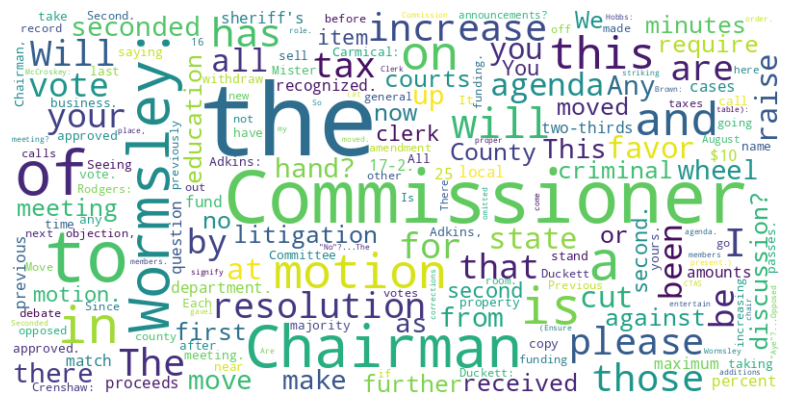

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

word_counts = Counter(meeting_transcript.split())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
rouge = Rouge()
reference_summary = """In this CTAS County Commission meeting, Chairman Wormsley calls the meeting to order and seeks approval for the agenda.
The minutes of the last meeting are reviewed, with a correction noted. Commissioner Adkins introduces a resolution to reallocate funds from the Data Processing Reserve Account for the purchase of a laptop.
Commissioner McKee withdraws a motion to sell property near the airport.
Commissioner Rodgers proposes increasing the state match local litigation tax, sparking a debate. Commissioner Duckett suggests an amendment to allocate 25 percent of the tax increase to fund the sheriff's department, which passes.
However, the motion to increase taxes fails. New business involves increasing the wheel tax to offset education funding cuts, passing on first passage. The meeting ends with announcements and adjournment."""

scores = rouge.get_scores(" ".join(extractive_summary), reference_summary)
rouge_scores = scores[0]

In [15]:

print("\nROUGE Scores:")
for key, value in rouge_scores.items():
    print(f"{key}:")
    for subkey, subvalue in value.items():
        print(f"  {subkey}: {subvalue*p}")


ROUGE Scores:
rouge-1:
  r: 0.5333333333333333
  p: 0.43636363636363634
  f: 0.47999999010000016
rouge-2:
  r: 0.23333333333333334
  p: 0.15384615384615385
  f: 0.1854304539976322
rouge-l:
  r: 0.5333333333333333
  p: 0.43636363636363634
  f: 0.47999999010000016
